<a href="https://colab.research.google.com/github/Ale1726/Machine-Learning-aplicado-al-Credit-Scoring/blob/main/Bosques_Aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn import tree
from random import sample
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from string import ascil_uppercase
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [33]:
clientes = pd.read_csv('/content/drive/MyDrive/proyecto 1/clientes.csv',index_col=[0])

In [34]:
#Se eligue 2/3 de los datos para crear arboles de decisiones aleatorios
clientes.sample(frac=2/3,replace=True)

,ID,GENERO,TIENE_AUTO,TIENE_PROPIEDAD,HIJOS,INGRESOS_ANUALES,CATEGORIA_DE_INGRESOS,NIVEL_EDUCATIVO,ESTADO_CIVIL,ESTADO_DE_PROPIEDAD,EDAD,TIEMPO_EMPLEO,TEL_CEL,TEL_TRABAJO,TEL_FIJO,CORREO,OCUPACION,DEPENDIENTES ECONOMICOS,STATUS,MOROSO
27295,5113926,1,0,0,0,90000.0,3,1,2,3,64.0,0.0,1,0,0,0,NaN,1.0,0,0
10422,5045482,0,1,1,0,202500.0,3,1,1,1,62.0,0.0,1,0,0,0,NaN,2.0,0,0
17801,5068323,1,0,1,0,171000.0,1,2,1,1,50.0,11.0,1,0,0,0,6.0,2.0,0,0
30990,5126369,1,0,0,0,135000.0,1,1,1,1,37.0,5.0,1,1,0,0,6.0,2.0,0,0
5675,5028441,0,1,1,0,315000.0,1,2,1,1,43.0,9.0,1,0,0,0,4.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32119,5135864,1,0,1,2,67500.0,1,1,1,1,33.0,2.0,1,0,0,0,3.0,4.0,0,0
15905,5065349,1,1,1,0,202500.0,1,2,1,1,42.0,11.0,1,0,0,0,6.0,2.0,0,0
13781,5054314,1,0,0,0,112500.0,2,1,1,1,56.0,5.0,1,1,1,0,6.0,2.0,2,0
23832,5096266,1,0,0,1,135000.0,1,1,1,1,43.0,25.0,1,1,1,0,NaN,3.0,0,0


In [40]:
columnas= list(clientes.columns.values)
no_deseados=['MOROSO','TEL_CEL','TEL_TRABAJO','TEL_FIJO','TIENE_AUTO',
             'CORREO','STATUS','ID','OCUPACION']
for no_deseado in no_deseados:
    columnas.remove(no_deseado)

print(clientes.columns.values)
print(columnas)
CLIENTES=clientes[columnas]
sample(set(CLIENTES.columns[:-1]),5)


['ID' 'GENERO' 'TIENE_AUTO' 'TIENE_PROPIEDAD' 'HIJOS' 'INGRESOS_ANUALES'
 'CATEGORIA_DE_INGRESOS' 'NIVEL_EDUCATIVO' 'ESTADO_CIVIL'
 'ESTADO_DE_PROPIEDAD' 'EDAD' 'TIEMPO_EMPLEO' 'TEL_CEL' 'TEL_TRABAJO'
 'TEL_FIJO' 'CORREO' 'OCUPACION' 'DEPENDIENTES ECONOMICOS' 'STATUS'
 'MOROSO']
['GENERO', 'TIENE_PROPIEDAD', 'HIJOS', 'INGRESOS_ANUALES', 'CATEGORIA_DE_INGRESOS', 'NIVEL_EDUCATIVO', 'ESTADO_CIVIL', 'ESTADO_DE_PROPIEDAD', 'EDAD', 'TIEMPO_EMPLEO', 'DEPENDIENTES ECONOMICOS']


['GENERO', 'ESTADO_DE_PROPIEDAD', 'ESTADO_CIVIL', 'EDAD', 'NIVEL_EDUCATIVO']

In [41]:
bosque = RandomForestClassifier(n_estimators=100,
                                criterion='entropy',#entropy
                                max_features= 'sqrt',
                                bootstrap=True,
                                max_samples=2/3, #muestro de los datos
                                oob_score=True  #evaluamos con las instancias que no fueron ocupadas
                                )



a=CLIENTES[CLIENTES.columns[:-1].values]
b=clientes['MOROSO']
#75 de entrenamiento, 25 prueba
x_entrena,x_prueba,y_entrena,y_prueba=train_test_split(a,b,random_state=42)
x_entrena
bosque.fit(x_entrena,y_entrena)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       max_samples=0.6666666666666666, oob_score=True)

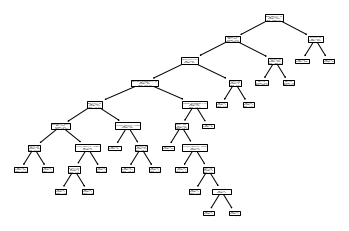

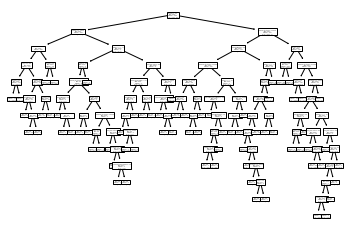

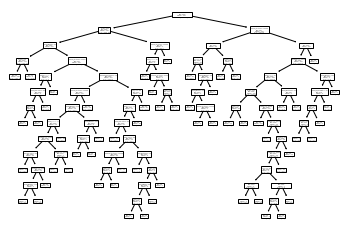

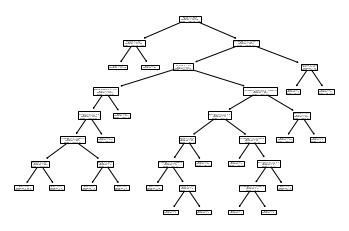

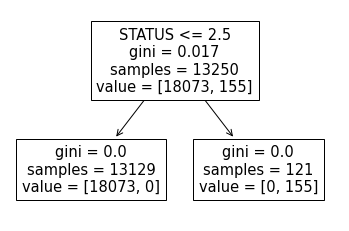

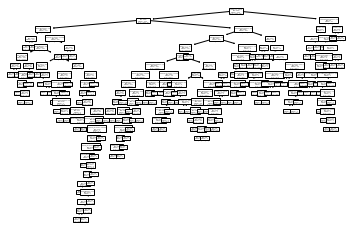

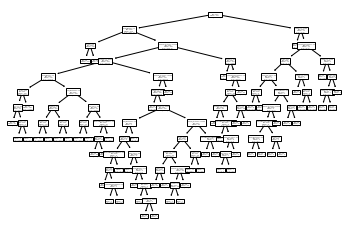

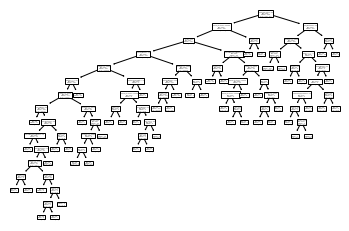

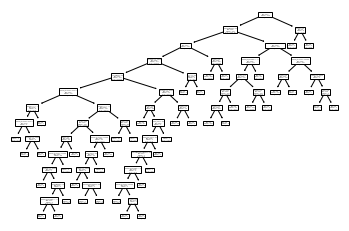

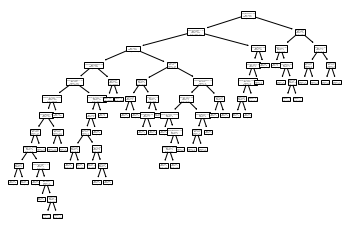

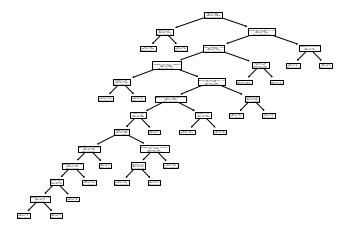

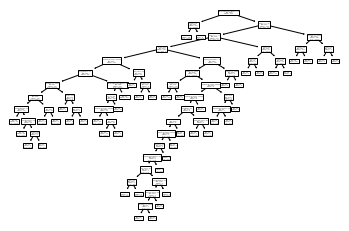

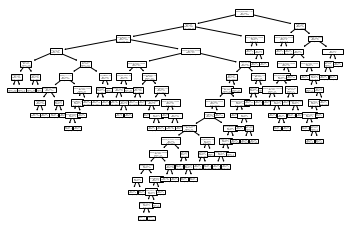

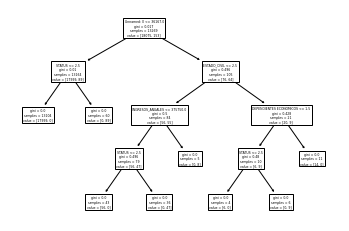

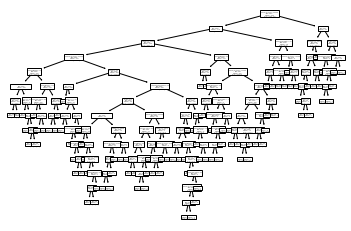

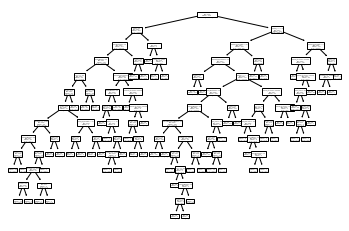

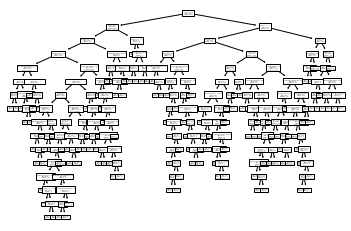

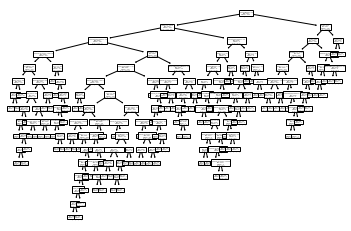

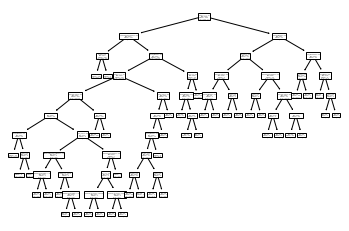

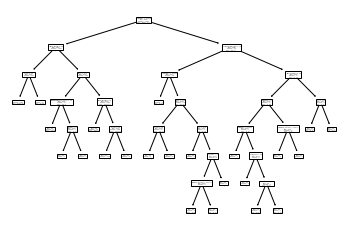

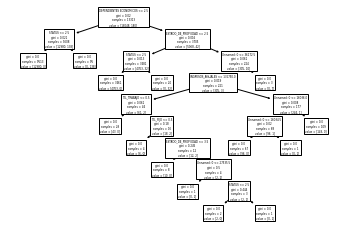

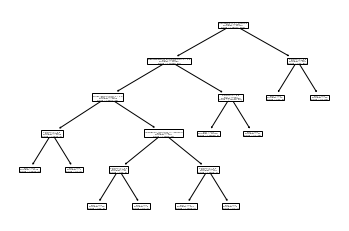

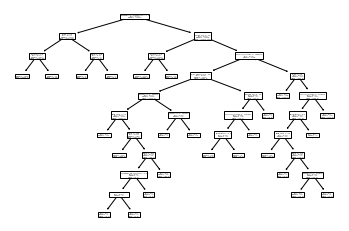

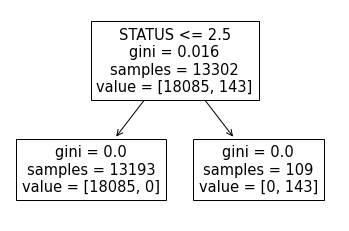

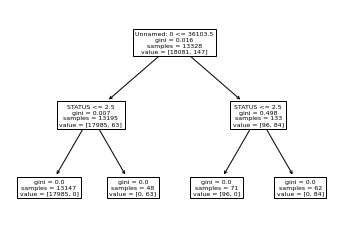

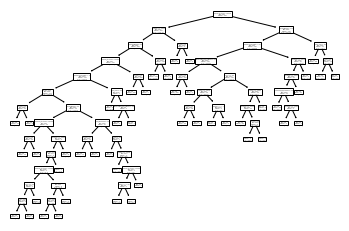

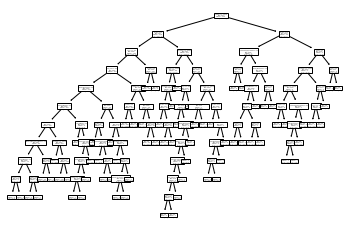

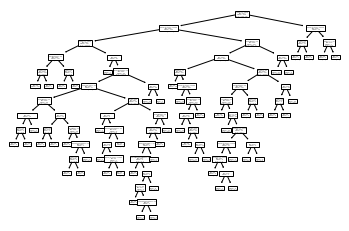

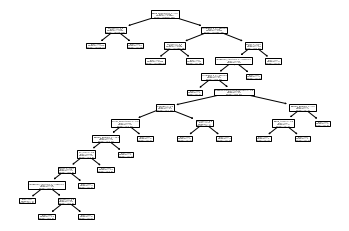

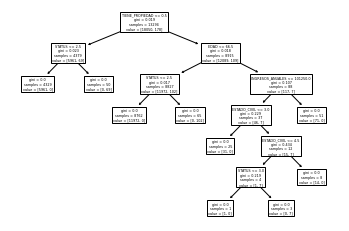

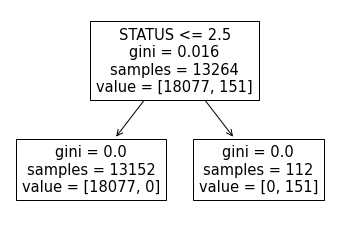

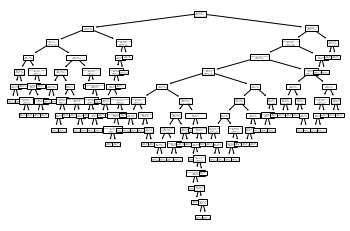

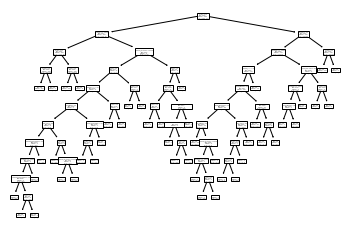

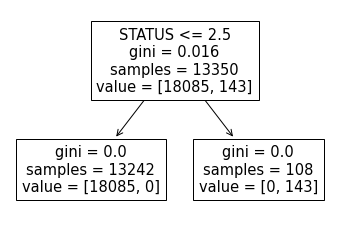

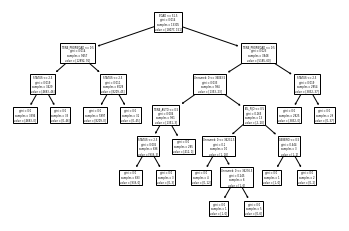

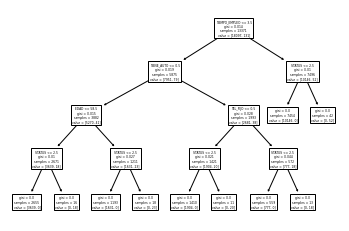

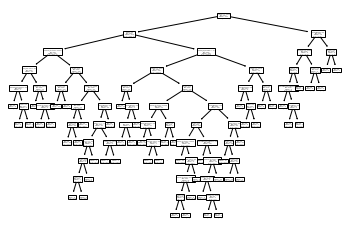

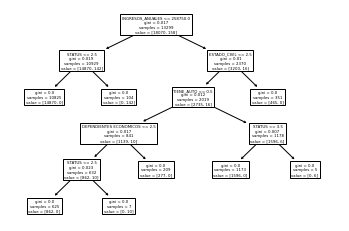

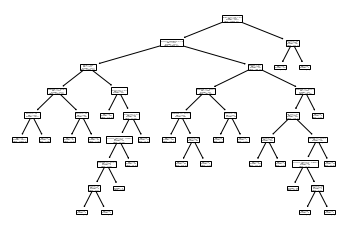

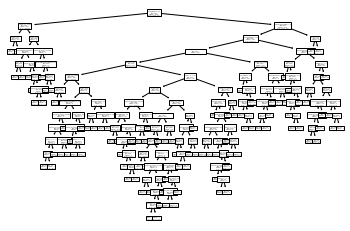

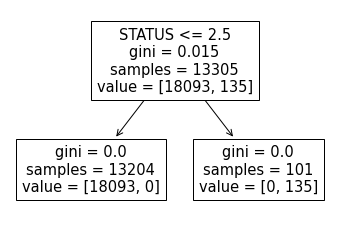

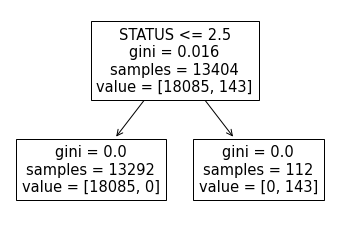

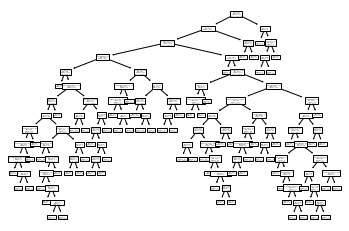

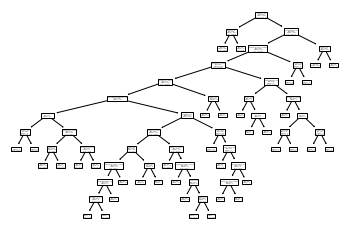

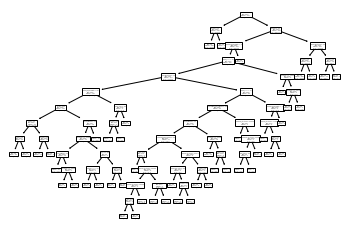

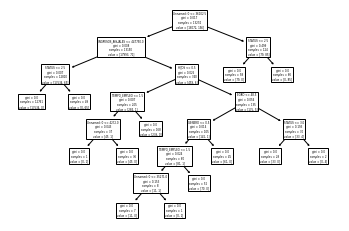

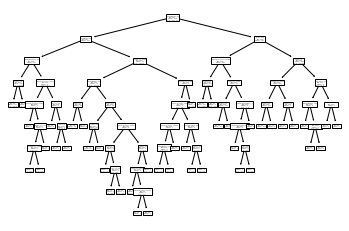

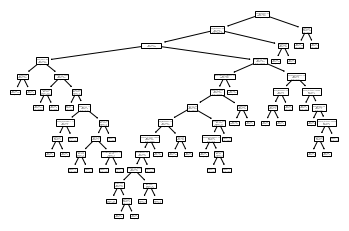

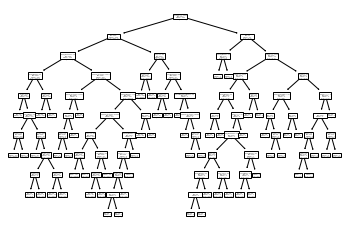

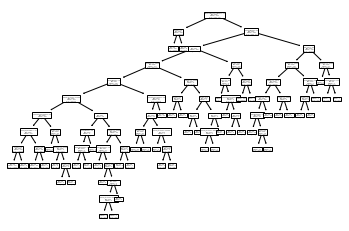

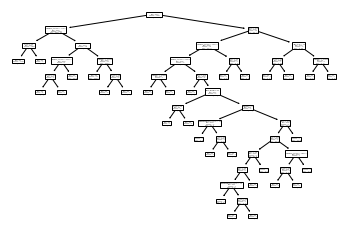

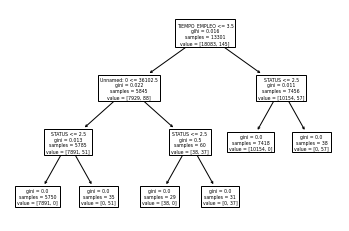

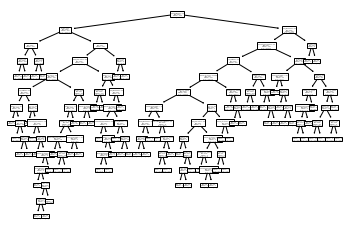

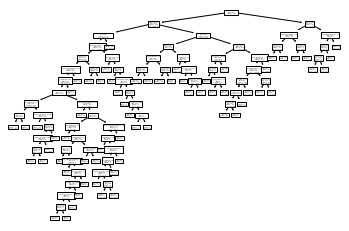

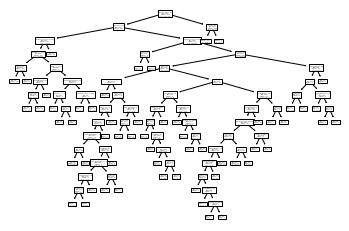

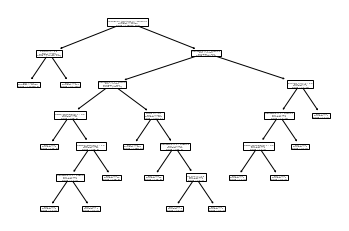

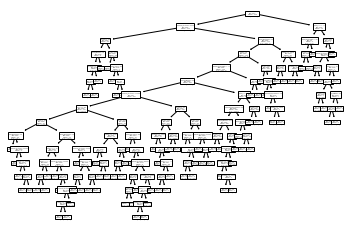

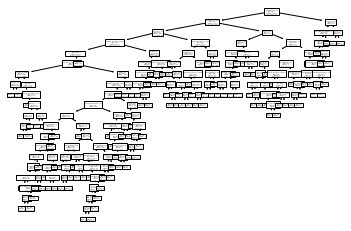

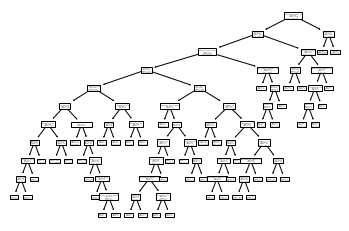

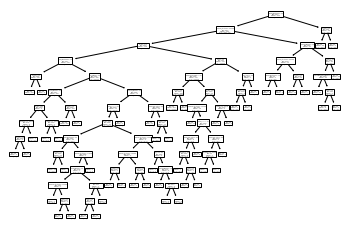

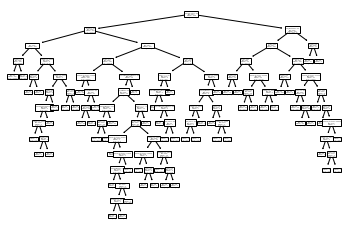

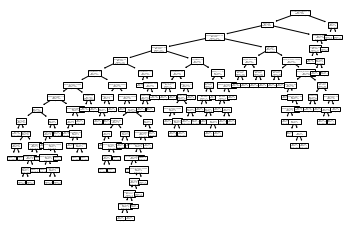

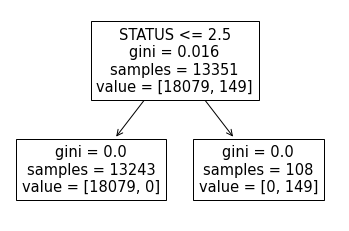

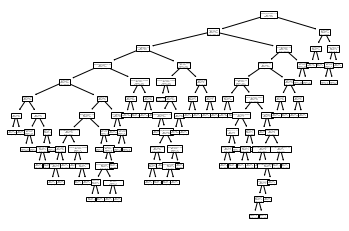

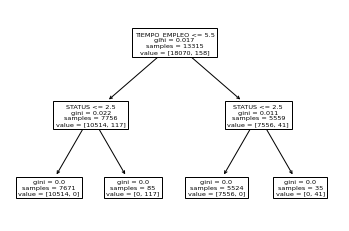

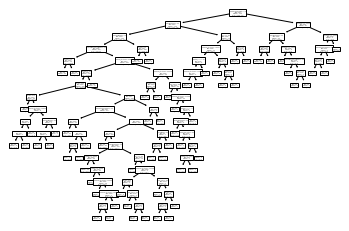

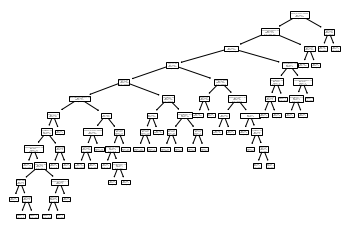

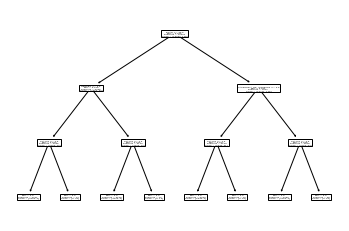

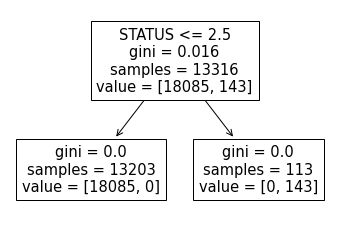

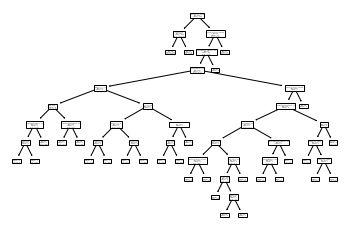

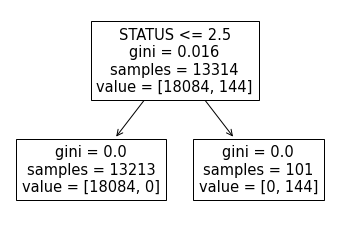

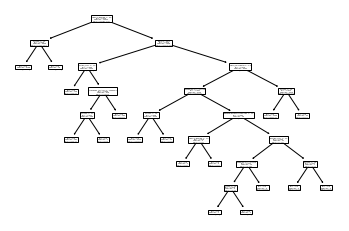

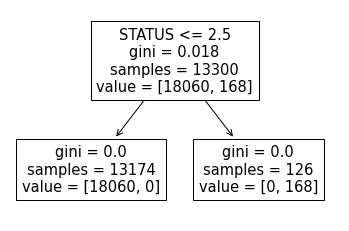

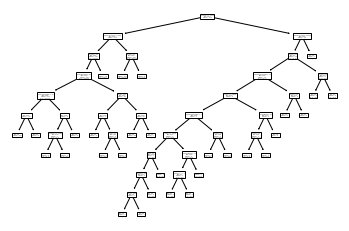

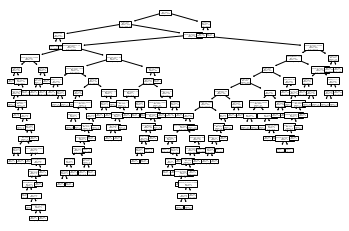

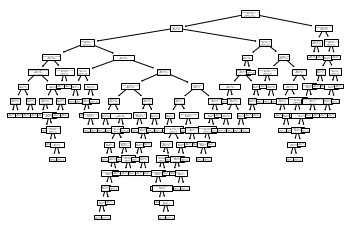

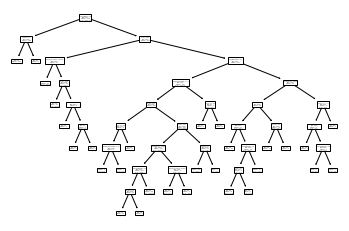

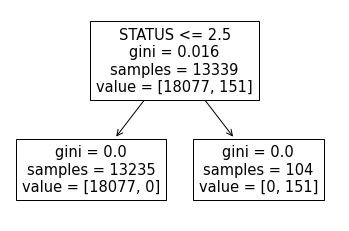

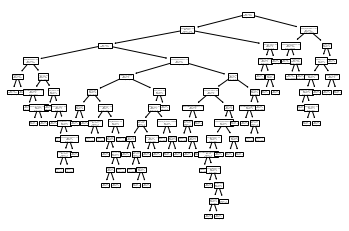

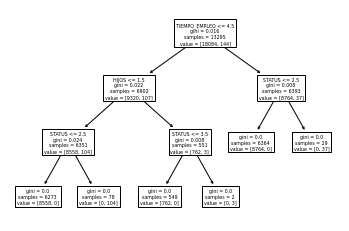

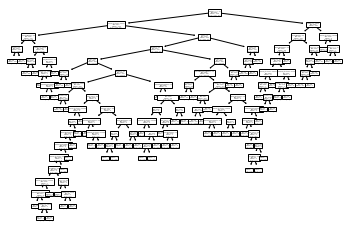

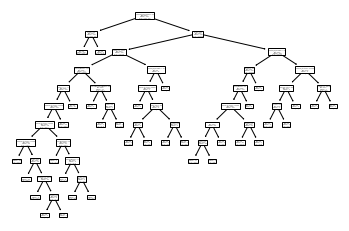

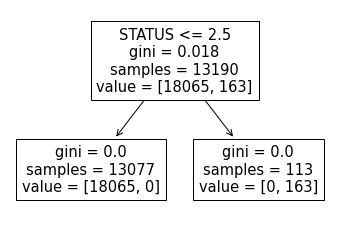

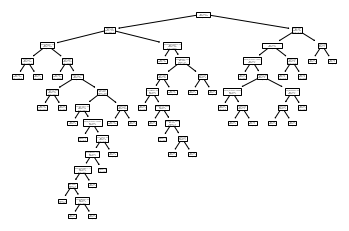

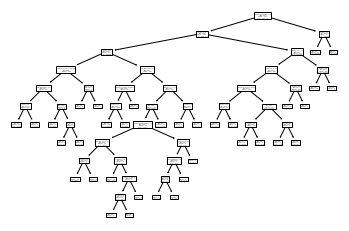

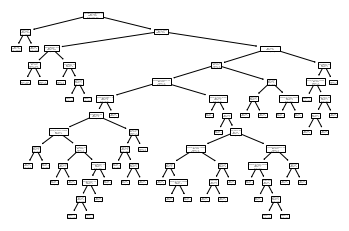

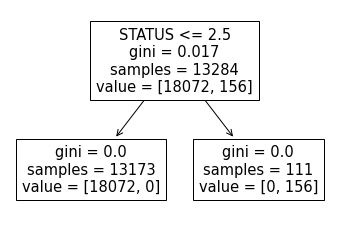

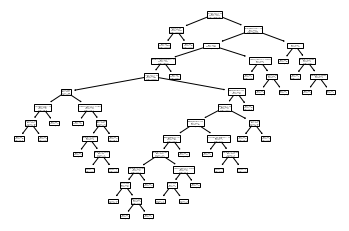

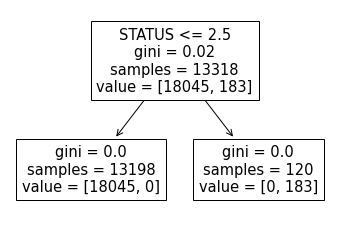

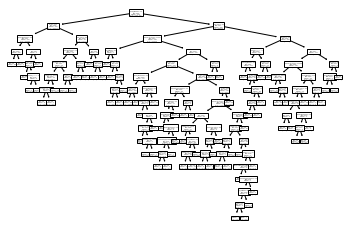

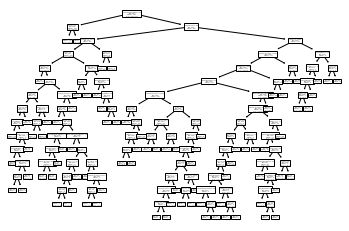

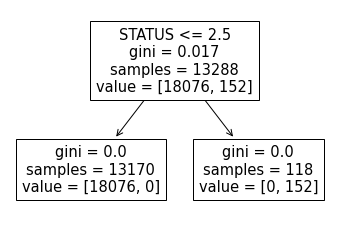

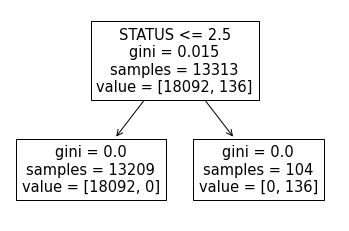

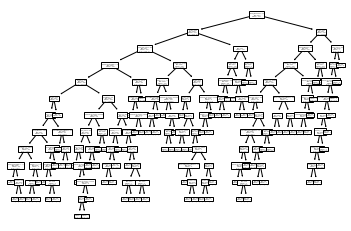

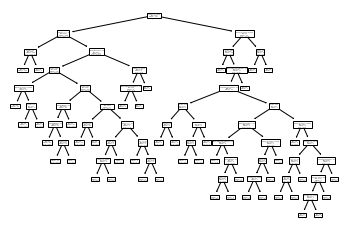

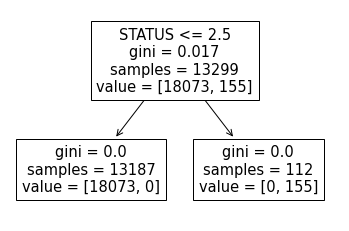

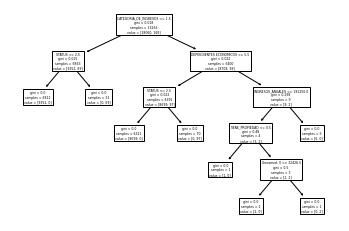

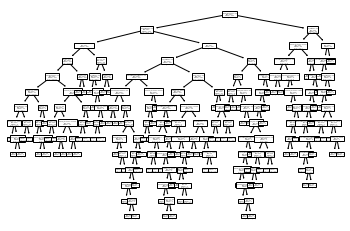

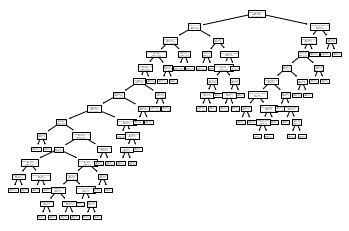

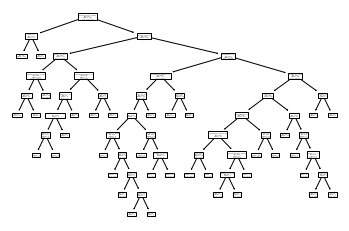

In [12]:
from sklearn import tree
for arbol in bosque:
  tree.plot_tree(arbol, feature_names=a.columns.values)
  plt.show()

In [42]:
cliente_aleatorio=x_entrena.sample()
print(cliente_aleatorio)

       GENERO  TIENE_PROPIEDAD  HIJOS  INGRESOS_ANUALES  \
22113       1                0      0          148500.0   

       CATEGORIA_DE_INGRESOS  NIVEL_EDUCATIVO  ESTADO_CIVIL  \
22113                      2                1             3   

       ESTADO_DE_PROPIEDAD  EDAD  TIEMPO_EMPLEO  
22113                    1  41.0            6.0  


In [43]:
x_prueba
y_predict=bosque.predict(x_prueba)
acuaracy_1=accuracy_score(y_prueba,y_predict)
print(acuaracy_1)

0.992210641799232


In [44]:
reporte=classification_report(y_prueba, y_predict)
print(reporte)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9045
           1       0.46      0.09      0.14        70

    accuracy                           0.99      9115
   macro avg       0.73      0.54      0.57      9115
weighted avg       0.99      0.99      0.99      9115

